In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import datasets
import os
import hiddenlayer as hl
from scipy import stats
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style()


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))/255

my_data = pd.read_csv('data/train.csv').to_numpy(copy=True)
np.random.shuffle(my_data)
xx = my_data[:,1:].reshape((my_data.shape[0], 28, 28, 1))/255.0 #norm
yy = my_data[:,0]
X = np.concatenate((my_data[:,1:].reshape((my_data.shape[0], 28, 28, 1)), train_images), axis=0)/255.0 #norm
y = np.concatenate((my_data[:,0],train_labels), axis=0)
train_dataset = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(100000).batch(1024)
X_train, X_val, Y_train, Y_val = train_test_split(X_2, y_2, test_size = 0.1, random_state=42)

test_data = pd.read_csv('data/test.csv').to_numpy(copy=True)
X_test = test_data.reshape((test_data.shape[0], 28, 28, 1))/255.0 #norm

In [3]:
def build_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
    return model
def build_model2():
    model = keras.Sequential([
        keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),  
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(256, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
    return model
def build_model5():
    model = keras.Sequential([
        keras.layers.Conv2D(128, (3, 3), activation='elu', input_shape=(28, 28, 1)),
        keras.layers.Conv2D(128, (3, 3), activation='elu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(256, (3, 3), activation='elu'),
        keras.layers.Conv2D(256, (3, 3), activation='elu'),  
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(512, (3, 3), activation='elu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),    
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
    return model
def build_model6():
    checkpoint_path = "training_model5/cp-{epoch:04d}.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    m5 = build_model5()
    m5.load_weights(latest)
    m5.layers
    m5.pop()
    m5.pop()
    m5.pop()
    m5.add(keras.layers.Dense(512, activation='relu'))
    m5.add(keras.layers.Dropout(0.4))
    m5.add(keras.layers.Dense(256, activation='relu'))
    m5.add(keras.layers.Dropout(0.4))
    m5.add(keras.layers.Dense(128, activation='relu'))
    m5.add(keras.layers.Dropout(0.4))
    m5.add(keras.layers.Dense(64, activation='relu'))
    m5.add(keras.layers.Dropout(0.4))
    m5.add(keras.layers.Dense(32, activation='relu'))
    m5.add(keras.layers.Dropout(0.4))
    m5.add(keras.layers.Dense(10, activation='softmax'))
    for layer in m5.layers[:12]:
        layer.trainable = False
    return m5
def build_model2_with_noise():
    model = keras.Sequential([
        keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),  
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(256, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.GaussianNoise(0.1),
        keras.layers.Flatten(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
    return model
def build_model3():
    model = keras.Sequential([
        keras.layers.TimeDistributed(keras.layers.LSTM(128), input_shape=(28, 28, 1)),
        keras.layers.LSTM(128),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
    return model
def build_model4():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (5, 5), activation='relu', padding='Valid', input_shape=(28, 28, 1)),
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='Same'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64, (5, 5), padding='Valid', activation='relu'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='Same'),  
        keras.layers.MaxPool2D((2,2), strides=(2, 2)),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
    return model
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [4]:
model = build_model()
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', #accuracy, val_accuracy
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [73]:
model2 = build_model2()
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_v2_25 (B (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 128)       

In [69]:
model3 = build_model3()
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 28, 128)           66560     
_________________________________________________________________
unified_lstm_1 (UnifiedLSTM) (None, 128)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 199,434
Trainable params: 199,434
Non-trainable params: 0
_________________________________________________________________


In [13]:
checkpoint_path = "training_3(rnn)/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history3 = model3.fit_generator(datagen.flow(X,y, batch_size=2048), epochs=10, validation_data = (test_images,test_labels), callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/10
49/50 [============================>.] - ETA: 22s - loss: 1.8372 - accuracy: 0.3428
Epoch 00001: saving model to training_3(rnn)/cp-0001.ckpt
50/50 [==============================] - 1154s 23s/step - loss: 1.8310 - accuracy: 0.3449 - val_loss: 1.1922 - val_accuracy: 0.5996
Epoch 2/10
49/50 [============================>.] - ETA: 21s - loss: 1.2339 - accuracy: 0.5679
Epoch 00002: saving model to training_3(rnn)/cp-0002.ckpt
50/50 [==============================] - 1114s 22s/step - loss: 1.2292 - accuracy: 0.5697 - val_loss: 0.8500 - val_accuracy: 0.7107
Epoch 3/10
49/50 [============================>.] - ETA: 22s - loss: 0.9911 - accuracy: 0.6584
Epoch 00003: saving model to training_3(rnn)/cp-0003.ckpt
50/50 [==============================] - 1158s 23s/step - loss: 0.9889 - accuracy: 0.6591 - val_loss: 0.8533 - val_accuracy: 0.7034
Epoch 4/10
49/50 [============================>.] - ETA: 22s - loss: 0.7935 - accuracy: 0.7282
Epoch 00004: saving model to training_3(rnn)/cp-00

In [14]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model3.load_weights(latest)
checkpoint_path = "training_3_1(rnn)/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history3 = model3.fit_generator(datagen.flow(X,y, batch_size=2048), epochs=25, validation_data = (test_images,test_labels), callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/25
49/50 [============================>.] - ETA: 23s - loss: 0.1964 - accuracy: 0.9393
Epoch 00001: saving model to training_3_1(rnn)/cp-0001.ckpt
50/50 [==============================] - 1226s 25s/step - loss: 0.1953 - accuracy: 0.9396 - val_loss: 0.0929 - val_accuracy: 0.9706
Epoch 2/25
49/50 [============================>.] - ETA: 23s - loss: 0.1711 - accuracy: 0.9465
Epoch 00002: saving model to training_3_1(rnn)/cp-0002.ckpt
50/50 [==============================] - 1221s 24s/step - loss: 0.1704 - accuracy: 0.9468 - val_loss: 0.0759 - val_accuracy: 0.9749
Epoch 3/25
49/50 [============================>.] - ETA: 23s - loss: 0.1460 - accuracy: 0.9552
Epoch 00003: saving model to training_3_1(rnn)/cp-0003.ckpt
50/50 [==============================] - 1225s 25s/step - loss: 0.1451 - accuracy: 0.9555 - val_loss: 0.0641 - val_accuracy: 0.9800
Epoch 4/25
49/50 [============================>.] - ETA: 23s - loss: 0.1314 - accuracy: 0.9594
Epoch 00004: saving model to training_3_1(rn

In [72]:
datagen.fit(X_train)
checkpoint_path = "training_3_2(rnn)/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history3_1 = model3.fit_generator(datagen.flow(X_train,Y_train, batch_size=2048), epochs=25, validation_data = (X_val,Y_val), callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/25
49/50 [============================>.] - ETA: 21s - loss: 0.0236 - accuracy: 0.9926
Epoch 00001: saving model to training_3_2(rnn)/cp-0001.ckpt
50/50 [==============================] - 1132s 23s/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0142 - val_accuracy: 0.9954
Epoch 2/25
49/50 [============================>.] - ETA: 23s - loss: 0.0227 - accuracy: 0.9929
Epoch 00002: saving model to training_3_2(rnn)/cp-0002.ckpt
50/50 [==============================] - 1221s 24s/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0154 - val_accuracy: 0.9954
Epoch 3/25
49/50 [============================>.] - ETA: 21s - loss: 0.0210 - accuracy: 0.9934
Epoch 00003: saving model to training_3_2(rnn)/cp-0003.ckpt
50/50 [==============================] - 1117s 22s/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0143 - val_accuracy: 0.9957
Epoch 4/25
49/50 [============================>.] - ETA: 23s - loss: 0.0214 - accuracy: 0.9933
Epoch 00004: saving model to training_3_2(rn

KeyboardInterrupt: 

In [71]:
model4 = build_model4()
model4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 64)        

In [27]:
datagen.fit(X)
checkpoint_path = "training_4/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history4 = model4.fit_generator(datagen.flow(X,y, batch_size=16384), epochs=42, validation_data = (test_images,test_labels), callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/42
6/7 [========================>.....] - ETA: 14s - loss: 0.1796 - accuracy: 0.9444
Epoch 00001: saving model to training_4/cp-0001.ckpt
7/7 [==============================] - 108s 15s/step - loss: 0.1794 - accuracy: 0.9450 - val_loss: 0.0524 - val_accuracy: 0.9836
Epoch 2/42
6/7 [========================>.....] - ETA: 16s - loss: 0.1707 - accuracy: 0.9482
Epoch 00002: saving model to training_4/cp-0002.ckpt
7/7 [==============================] - 104s 15s/step - loss: 0.1680 - accuracy: 0.9486 - val_loss: 0.0491 - val_accuracy: 0.9835
Epoch 3/42
6/7 [========================>.....] - ETA: 14s - loss: 0.1535 - accuracy: 0.9533
Epoch 00003: saving model to training_4/cp-0003.ckpt
7/7 [==============================] - 107s 15s/step - loss: 0.1523 - accuracy: 0.9534 - val_loss: 0.0453 - val_accuracy: 0.9852
Epoch 4/42
6/7 [========================>.....] - ETA: 14s - loss: 0.1461 - accuracy: 0.9553
Epoch 00004: saving model to training_4/cp-0004.ckpt
7/7 [========================

Epoch 31/42
6/7 [========================>.....] - ETA: 14s - loss: 0.0649 - accuracy: 0.9804
Epoch 00031: saving model to training_4/cp-0031.ckpt
7/7 [==============================] - 106s 15s/step - loss: 0.0644 - accuracy: 0.9805 - val_loss: 0.0188 - val_accuracy: 0.9939
Epoch 32/42
6/7 [========================>.....] - ETA: 14s - loss: 0.0627 - accuracy: 0.9801
Epoch 00032: saving model to training_4/cp-0032.ckpt
7/7 [==============================] - 105s 15s/step - loss: 0.0622 - accuracy: 0.9803 - val_loss: 0.0184 - val_accuracy: 0.9944
Epoch 33/42
6/7 [========================>.....] - ETA: 14s - loss: 0.0612 - accuracy: 0.9811
Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00033: saving model to training_4/cp-0033.ckpt
7/7 [==============================] - 105s 15s/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0169 - val_accuracy: 0.9944
Epoch 34/42
6/7 [========================>.....] - ETA: 14s - loss: 0.0576 - accuracy: 0.98

In [69]:
datagen.fit(X_train)
checkpoint_path = "training_4_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history4 = model4.fit_generator(datagen.flow(X_train,Y_train, batch_size=16384), epochs=25, validation_data = (X_val,Y_val), callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/25
6/7 [========================>.....] - ETA: 14s - loss: 0.0590 - accuracy: 0.9819
Epoch 00001: saving model to training_4_1/cp-0001.ckpt
7/7 [==============================] - 107s 15s/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0195 - val_accuracy: 0.9946
Epoch 2/25
6/7 [========================>.....] - ETA: 14s - loss: 0.0563 - accuracy: 0.9823
Epoch 00002: saving model to training_4_1/cp-0002.ckpt
7/7 [==============================] - 104s 15s/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0199 - val_accuracy: 0.9941
Epoch 3/25
6/7 [========================>.....] - ETA: 14s - loss: 0.0575 - accuracy: 0.9829
Epoch 00003: saving model to training_4_1/cp-0003.ckpt
7/7 [==============================] - 104s 15s/step - loss: 0.0574 - accuracy: 0.9828 - val_loss: 0.0199 - val_accuracy: 0.9938
Epoch 4/25
6/7 [========================>.....] - ETA: 14s - loss: 0.0572 - accuracy: 0.9828
Epoch 00004: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-

In [44]:
datagen.fit(X_train)
model2 = build_model2()
checkpoint_path = "training_model2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history2 = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=4096), epochs=42, validation_data = (X_val,Y_val), callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/42
24/25 [===========================>..] - ETA: 11s - loss: 0.3866 - accuracy: 0.8778
Epoch 00001: saving model to training_model2/cp-0001.ckpt
25/25 [==============================] - 282s 11s/step - loss: 0.3744 - accuracy: 0.8819 - val_loss: 2.1333 - val_accuracy: 0.2438
Epoch 2/42
24/25 [===========================>..] - ETA: 11s - loss: 0.0567 - accuracy: 0.9833
Epoch 00002: saving model to training_model2/cp-0002.ckpt
25/25 [==============================] - 281s 11s/step - loss: 0.0565 - accuracy: 0.9832 - val_loss: 2.1747 - val_accuracy: 0.1107
Epoch 3/42
24/25 [===========================>..] - ETA: 11s - loss: 0.0360 - accuracy: 0.9889
Epoch 00003: saving model to training_model2/cp-0003.ckpt
25/25 [==============================] - 282s 11s/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 2.1843 - val_accuracy: 0.1289
Epoch 4/42
24/25 [===========================>..] - ETA: 10s - loss: 0.0284 - accuracy: 0.9913
Epoch 00004: saving model to training_model2/cp-0004.

Epoch 30/42
24/25 [===========================>..] - ETA: 10s - loss: 0.0047 - accuracy: 0.9986
Epoch 00030: saving model to training_model2/cp-0030.ckpt
25/25 [==============================] - 280s 11s/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0091 - val_accuracy: 0.9973
Epoch 31/42
24/25 [===========================>..] - ETA: 11s - loss: 0.0050 - accuracy: 0.9984
Epoch 00031: saving model to training_model2/cp-0031.ckpt
25/25 [==============================] - 286s 11s/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0083 - val_accuracy: 0.9977
Epoch 32/42
24/25 [===========================>..] - ETA: 10s - loss: 0.0052 - accuracy: 0.9983
Epoch 00032: saving model to training_model2/cp-0032.ckpt
25/25 [==============================] - 278s 11s/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0103 - val_accuracy: 0.9971
Epoch 33/42
24/25 [===========================>..] - ETA: 10s - loss: 0.0045 - accuracy: 0.9985
Epoch 00033: saving model to training_model2/cp-0

In [64]:
datagen.fit(X_train)
model2_noise = build_model2_with_noise()
checkpoint_path = "training_model2_noise/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history2_noise = model2_noise.fit_generator(datagen.flow(X_train,Y_train, batch_size=4096), epochs=42, validation_data = (X_val,Y_val), callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/42
24/25 [===========================>..] - ETA: 11s - loss: 0.3826 - accuracy: 0.8828
Epoch 00001: saving model to training_model2_noise/cp-0001.ckpt
25/25 [==============================] - 290s 12s/step - loss: 0.3702 - accuracy: 0.8866 - val_loss: 2.1644 - val_accuracy: 0.2037
Epoch 2/42
24/25 [===========================>..] - ETA: 11s - loss: 0.0581 - accuracy: 0.9822
Epoch 00002: saving model to training_model2_noise/cp-0002.ckpt
25/25 [==============================] - 281s 11s/step - loss: 0.0579 - accuracy: 0.9823 - val_loss: 2.3117 - val_accuracy: 0.1849
Epoch 3/42
24/25 [===========================>..] - ETA: 10s - loss: 0.0368 - accuracy: 0.9886
Epoch 00003: saving model to training_model2_noise/cp-0003.ckpt
25/25 [==============================] - 268s 11s/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 2.4914 - val_accuracy: 0.0992
Epoch 4/42
24/25 [===========================>..] - ETA: 10s - loss: 0.0291 - accuracy: 0.9910
Epoch 00004: ReduceLROnPlateau redu

Epoch 29/42
24/25 [===========================>..] - ETA: 13s - loss: 0.0082 - accuracy: 0.9977
Epoch 00029: saving model to training_model2_noise/cp-0029.ckpt
25/25 [==============================] - 337s 13s/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0112 - val_accuracy: 0.9962
Epoch 30/42
24/25 [===========================>..] - ETA: 13s - loss: 0.0080 - accuracy: 0.9975
Epoch 00030: saving model to training_model2_noise/cp-0030.ckpt
25/25 [==============================] - 338s 14s/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0109 - val_accuracy: 0.9965
Epoch 31/42
24/25 [===========================>..] - ETA: 13s - loss: 0.0074 - accuracy: 0.9979
Epoch 00031: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00031: saving model to training_model2_noise/cp-0031.ckpt
25/25 [==============================] - 337s 13s/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0114 - val_accuracy: 0.9965
Epoch 32/42
24/25 [===========================>

In [5]:
datagen.fit(X_2)
model5= build_model5()
checkpoint_path = "training_model5/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', #accuracy, val_accuracy
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history5 = model5.fit_generator(datagen.flow(X_2,y_2, batch_size=4096), epochs=42, callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/42
27/28 [===========================>..] - ETA: 43s - loss: 0.4275 - accuracy: 0.8614 
Epoch 00001: saving model to training_model5/cp-0001.ckpt
28/28 [==============================] - 1216s 43s/step - loss: 0.4168 - accuracy: 0.8651
Epoch 2/42
27/28 [===========================>..] - ETA: 45s - loss: 0.0751 - accuracy: 0.9768 
Epoch 00002: saving model to training_model5/cp-0002.ckpt
28/28 [==============================] - 1277s 46s/step - loss: 0.0742 - accuracy: 0.9771
Epoch 3/42
27/28 [===========================>..] - ETA: 52s - loss: 0.0517 - accuracy: 0.9841 
Epoch 00003: saving model to training_model5/cp-0003.ckpt
28/28 [==============================] - 1447s 52s/step - loss: 0.0519 - accuracy: 0.9841
Epoch 4/42
27/28 [===========================>..] - ETA: 33s - loss: 0.0374 - accuracy: 0.9884 
Epoch 00004: saving model to training_model5/cp-0004.ckpt
28/28 [==============================] - 955s 34s/step - loss: 0.0372 - accuracy: 0.9885
Epoch 5/42
27/28 [=======

Epoch 34/42
27/28 [===========================>..] - ETA: 31s - loss: 0.0038 - accuracy: 0.9989 
Epoch 00034: saving model to training_model5/cp-0034.ckpt
28/28 [==============================] - 895s 32s/step - loss: 0.0039 - accuracy: 0.9989
Epoch 35/42
27/28 [===========================>..] - ETA: 33s - loss: 0.0037 - accuracy: 0.9988 
Epoch 00035: saving model to training_model5/cp-0035.ckpt
28/28 [==============================] - 944s 34s/step - loss: 0.0037 - accuracy: 0.9988
Epoch 36/42
27/28 [===========================>..] - ETA: 35s - loss: 0.0032 - accuracy: 0.9990 
Epoch 00036: saving model to training_model5/cp-0036.ckpt
28/28 [==============================] - 996s 36s/step - loss: 0.0032 - accuracy: 0.9990
Epoch 37/42
27/28 [===========================>..] - ETA: 34s - loss: 0.0033 - accuracy: 0.9990 
Epoch 00037: saving model to training_model5/cp-0037.ckpt
28/28 [==============================] - 975s 35s/step - loss: 0.0033 - accuracy: 0.9990
Epoch 38/42
27/28 [=====

In [27]:
datagen.fit(xx)

model5 = build_model5()
checkpoint_path = "training_model5/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model5.load_weights(latest)

model6 = build_model6()
checkpoint_path = "training_model6/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model6.load_weights(latest)
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', #accuracy, val_accuracy
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpoint_path = "training_model6_1/cp-{epoch:04d}.ckpt"

for layer in model6.layers:
    layer.trainable = True
model6.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history6 = model6.fit_generator(datagen.flow(xx,yy, batch_size=2048*2), epochs=50, callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/50
10/11 [==========================>...] - ETA: 31s - loss: 0.2009 - accuracy: 0.9619 
Epoch 00001: saving model to training_model6_1/cp-0001.ckpt
11/11 [==============================] - 355s 32s/step - loss: 0.1954 - accuracy: 0.9623
Epoch 2/50
10/11 [==========================>...] - ETA: 31s - loss: 0.1461 - accuracy: 0.9665 
Epoch 00002: saving model to training_model6_1/cp-0002.ckpt
11/11 [==============================] - 351s 32s/step - loss: 0.1438 - accuracy: 0.9671
Epoch 3/50
10/11 [==========================>...] - ETA: 31s - loss: 0.1072 - accuracy: 0.9751 
Epoch 00003: saving model to training_model6_1/cp-0003.ckpt
11/11 [==============================] - 354s 32s/step - loss: 0.1081 - accuracy: 0.9750
Epoch 4/50
10/11 [==========================>...] - ETA: 30s - loss: 0.0951 - accuracy: 0.9783 
Epoch 00004: saving model to training_model6_1/cp-0004.ckpt
11/11 [==============================] - 342s 31s/step - loss: 0.0946 - accuracy: 0.9783
Epoch 5/50
10/11 [==

Epoch 34/50
10/11 [==========================>...] - ETA: 30s - loss: 0.0294 - accuracy: 0.9927 
Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00034: saving model to training_model6_1/cp-0034.ckpt
11/11 [==============================] - 341s 31s/step - loss: 0.0290 - accuracy: 0.9926
Epoch 35/50
10/11 [==========================>...] - ETA: 30s - loss: 0.0321 - accuracy: 0.9925 
Epoch 00035: saving model to training_model6_1/cp-0035.ckpt
11/11 [==============================] - 340s 31s/step - loss: 0.0315 - accuracy: 0.9925
Epoch 36/50
10/11 [==========================>...] - ETA: 30s - loss: 0.0280 - accuracy: 0.9932 
Epoch 00036: saving model to training_model6_1/cp-0036.ckpt
11/11 [==============================] - 340s 31s/step - loss: 0.0278 - accuracy: 0.9934
Epoch 37/50
10/11 [==========================>...] - ETA: 30s - loss: 0.0274 - accuracy: 0.9934 
Epoch 00037: saving model to training_model6_1/cp-0037.ckpt
11/11 [=================

In [42]:
datagen.fit(X)

model5 = build_model5()
checkpoint_path = "training_model5/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model5.load_weights(latest)

model6 = build_model6()
checkpoint_path = "training_model6_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model6.load_weights(latest)
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', #accuracy, val_accuracy
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
checkpoint_path = "training_model6_2/cp-{epoch:04d}.ckpt"

for layer in model6.layers:
    layer.trainable = True
model6.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history6 = model6.fit_generator(datagen.flow(X,y, batch_size=2048*2), epochs=15, callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/15
24/25 [===========================>..] - ETA: 33s - loss: 0.0727 - accuracy: 0.9866 
Epoch 00001: saving model to training_model6_2/cp-0001.ckpt
25/25 [==============================] - 838s 34s/step - loss: 0.0723 - accuracy: 0.9866
Epoch 2/15
24/25 [===========================>..] - ETA: 32s - loss: 0.0566 - accuracy: 0.9890 
Epoch 00002: saving model to training_model6_2/cp-0002.ckpt
25/25 [==============================] - 820s 33s/step - loss: 0.0560 - accuracy: 0.9891
Epoch 3/15
24/25 [===========================>..] - ETA: 32s - loss: 0.0528 - accuracy: 0.9895 
Epoch 00003: saving model to training_model6_2/cp-0003.ckpt
25/25 [==============================] - 821s 33s/step - loss: 0.0530 - accuracy: 0.9894
Epoch 4/15
24/25 [===========================>..] - ETA: 32s - loss: 0.0463 - accuracy: 0.9906 
Epoch 00004: saving model to training_model6_2/cp-0004.ckpt
25/25 [==============================] - 821s 33s/step - loss: 0.0464 - accuracy: 0.9906
Epoch 5/15
24/25 [==

In [ ]:
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [7]:
history = model.fit_generator(datagen.flow(X,y, batch_size=8192), epochs=30, validation_data = (test_images,test_labels), callbacks=[learning_rate_reduction, cp_callback])
#history = model.fit_generator(datagen.flow(X,y, batch_size=1024), epochs=30, callbacks=[learning_rate_reduction])
#model.fit(train_dataset, epochs=5)

Epoch 1/30
12/13 [==========================>...] - ETA: 11s - loss: 1.8391 - accuracy: 0.3796
Epoch 00001: saving model to training/cp-0001.ckpt
13/13 [==============================] - 156s 12s/step - loss: 1.7943 - accuracy: 0.3956 - val_loss: 2.0180 - val_accuracy: 0.7797
Epoch 2/30
12/13 [==========================>...] - ETA: 11s - loss: 0.8687 - accuracy: 0.7111
Epoch 00002: saving model to training/cp-0002.ckpt
13/13 [==============================] - 152s 12s/step - loss: 0.8516 - accuracy: 0.7175 - val_loss: 1.7842 - val_accuracy: 0.9102
Epoch 3/30
12/13 [==========================>...] - ETA: 11s - loss: 0.4917 - accuracy: 0.8441
Epoch 00003: saving model to training/cp-0003.ckpt
13/13 [==============================] - 148s 11s/step - loss: 0.4840 - accuracy: 0.8470 - val_loss: 1.6476 - val_accuracy: 0.9480
Epoch 4/30
12/13 [==========================>...] - ETA: 11s - loss: 0.3294 - accuracy: 0.8988
Epoch 00004: saving model to training/cp-0004.ckpt
13/13 [================

Epoch 30/30
12/13 [==========================>...] - ETA: 10s - loss: 0.0903 - accuracy: 0.9732
Epoch 00030: saving model to training/cp-0030.ckpt
13/13 [==============================] - 134s 10s/step - loss: 0.0897 - accuracy: 0.9735 - val_loss: 0.1336 - val_accuracy: 0.9838


In [14]:
#train some more!!
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history2 = model.fit_generator(datagen.flow(X,y, batch_size=8192), epochs=30, validation_data = (test_images,test_labels), callbacks=[learning_rate_reduction, cp_callback])

Epoch 1/30
12/13 [==========================>...] - ETA: 11s - loss: 0.0898 - accuracy: 0.9737
Epoch 00001: saving model to training_2/cp-0001.ckpt
13/13 [==============================] - 149s 11s/step - loss: 0.0895 - accuracy: 0.9738 - val_loss: 0.1216 - val_accuracy: 0.9837
Epoch 2/30
12/13 [==========================>...] - ETA: 11s - loss: 0.0899 - accuracy: 0.9743
Epoch 00002: saving model to training_2/cp-0002.ckpt
13/13 [==============================] - 149s 11s/step - loss: 0.0896 - accuracy: 0.9742 - val_loss: 0.1067 - val_accuracy: 0.9851
Epoch 3/30
12/13 [==========================>...] - ETA: 10s - loss: 0.0897 - accuracy: 0.9741
Epoch 00003: saving model to training_2/cp-0003.ckpt
13/13 [==============================] - 134s 10s/step - loss: 0.0898 - accuracy: 0.9740 - val_loss: 0.0890 - val_accuracy: 0.9863
Epoch 4/30
12/13 [==========================>...] - ETA: 11s - loss: 0.0866 - accuracy: 0.9742
Epoch 00004: saving model to training_2/cp-0004.ckpt
13/13 [========

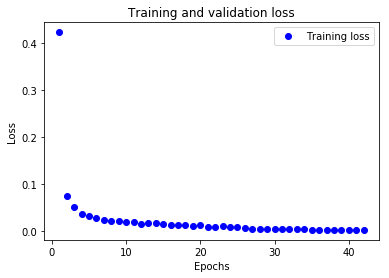

In [7]:
history_dict = history5.history
acc = history_dict['accuracy']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

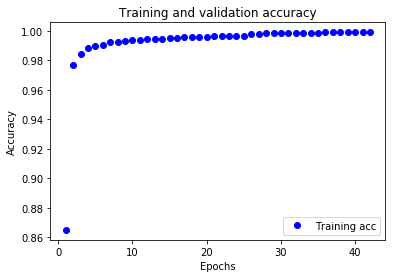

In [8]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

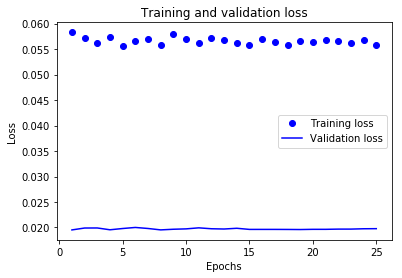

In [70]:
history_dict = history4.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

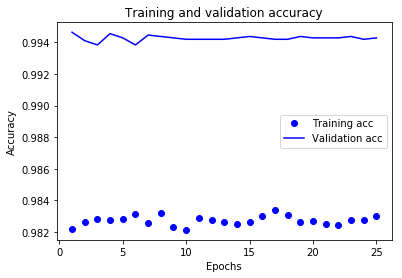

In [71]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

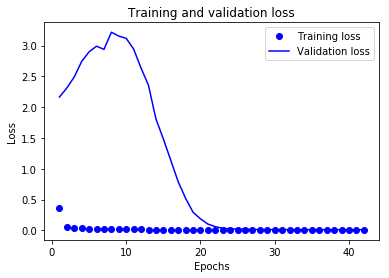

In [65]:
history_dict = history2.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

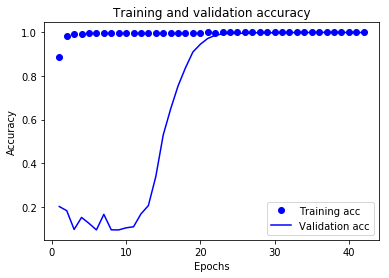

In [66]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

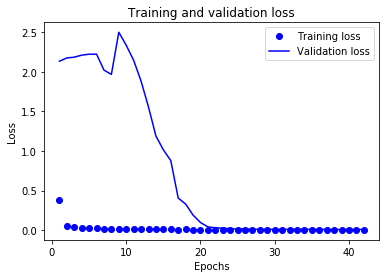

In [45]:
history_dict = history2.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

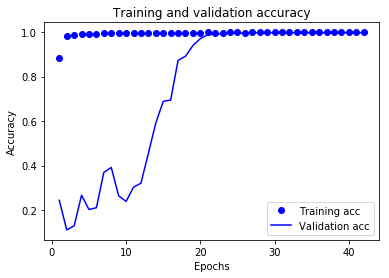

In [46]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

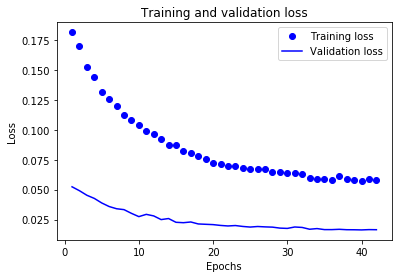

In [28]:
history_dict = history4.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

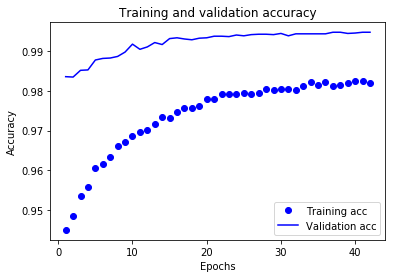

In [29]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

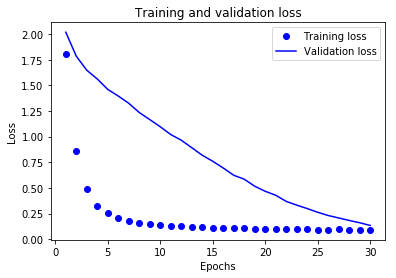

In [9]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

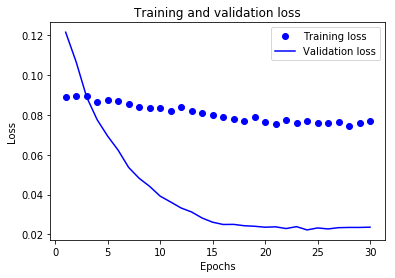

In [15]:
history_dict = history2.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

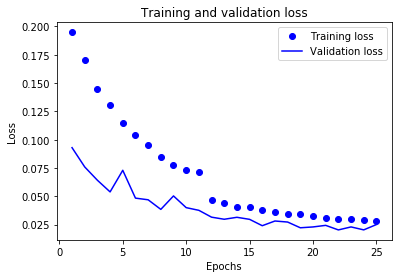

In [15]:
history_dict = history3.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

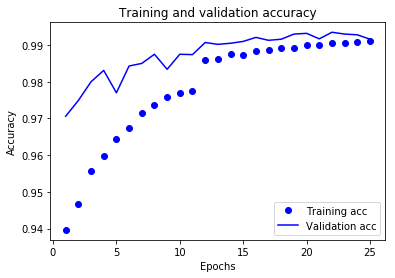

In [16]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

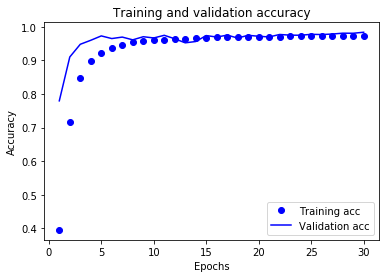

In [10]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

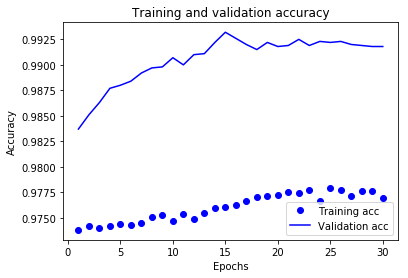

In [16]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
model = build_model()
model3 = build_model3()
model4 = build_model4()
model2 = build_model2()
model2_noise = build_model2_with_noise()
model5 = build_model5()
model6 = build_model6()

checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)
checkpoint_path = "training_3_2(rnn)/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model3.load_weights(latest)
checkpoint_path = "training_4_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model4.load_weights(latest)
checkpoint_path = "training_model2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model2.load_weights(latest)
checkpoint_path = "training_model2_noise/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model2_noise.load_weights(latest)
checkpoint_path = "training_model5/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model5.load_weights(latest)
checkpoint_path = "training_model6_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model6.load_weights(latest)

pred_list = []
p1 = model.predict(X_test)
p2 = model2.predict(X_test)
p2_noise = model2_noise.predict(X_test)
p3 = model3.predict(X_test)
p4 = model4.predict(X_test)
p5 = model5.predict(X_test)
p6 = model6.predict(X_test)
pred_list = [p1,p2,p2_noise,p3,p4, p5, p6]
p_avg = (p1+p2+p2_noise+p3+p4+p5+ p6)/6

In [15]:
class_most_certain = np.zeros(X_test.shape[0]).astype('int32')
model_most_certain = np.zeros(X_test.shape[0]).astype('int32')
pred_most_certain = np.zeros(X_test.shape[0])
class_most_popular = np.zeros(X_test.shape[0]).astype('int32')

for i in range(X_test.shape[0]):
    most_certain = [0,0,0]#model,pred,class
    pop_class = np.zeros(10)
    for item in range(len(pred_list)):
        max_pred = np.max(pred_list[item][i])
        max_pred_class = np.argmax(pred_list[item][i])
        pop_class[max_pred_class] += 1
        if most_certain[1] < max_pred:
            most_certain = [item,max_pred,max_pred_class]
    class_most_certain[i] = most_certain[2]
    model_most_certain[i] = most_certain[0]
    pred_most_certain[i] = most_certain[1]
    class_most_popular[i] = np.argmax(pop_class)

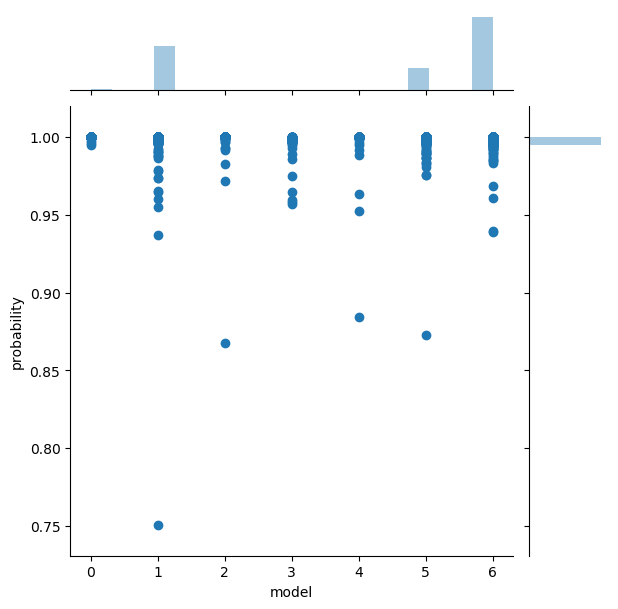

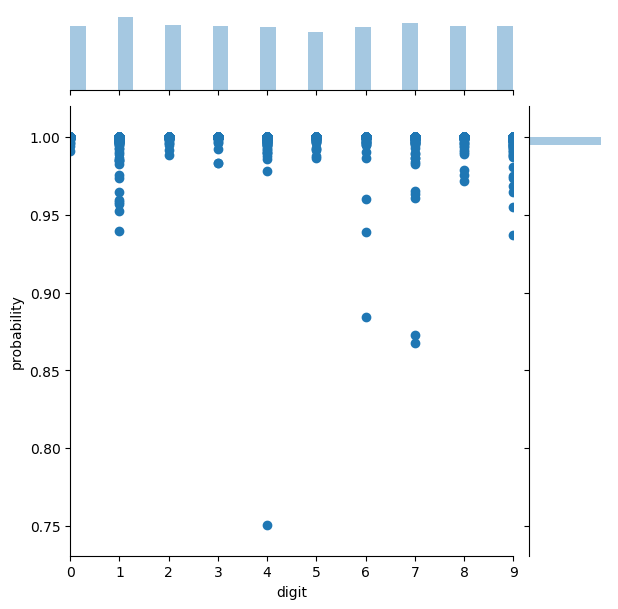

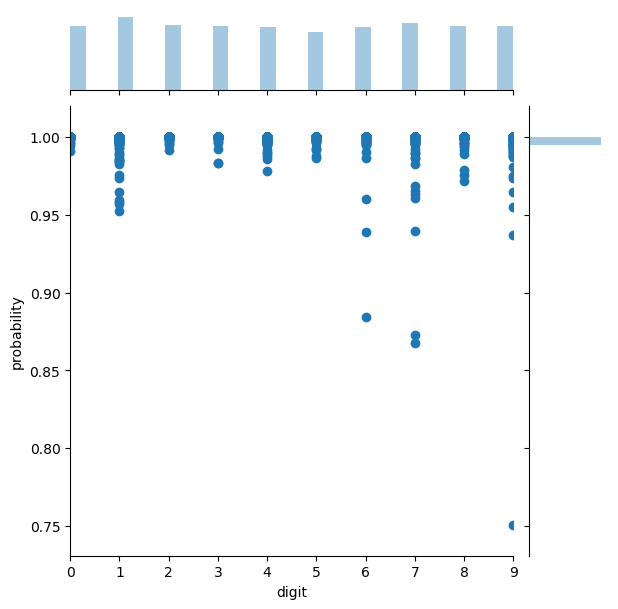

In [19]:
sns.jointplot(y=pred_most_certain, x=model_most_certain).set_axis_labels("model", "probability");
sns.jointplot(y=pred_most_certain, x=class_most_popular, xlim=(0,9)).set_axis_labels("digit", "probability");
sns.jointplot(y=pred_most_certain, x=class_most_certain, xlim=(0,9)).set_axis_labels("digit", "probability");

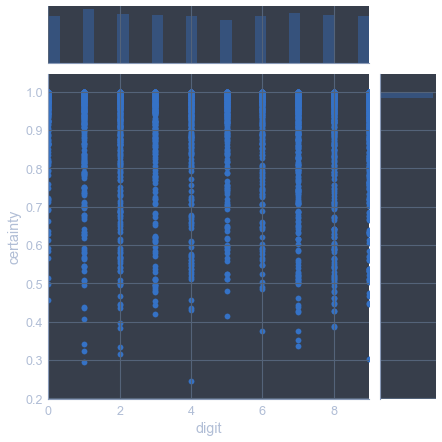

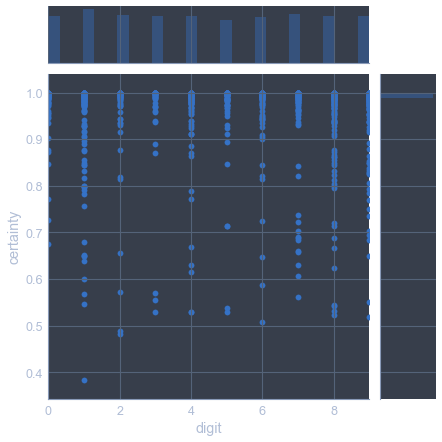

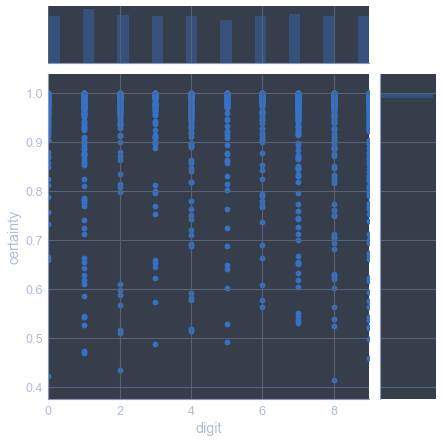

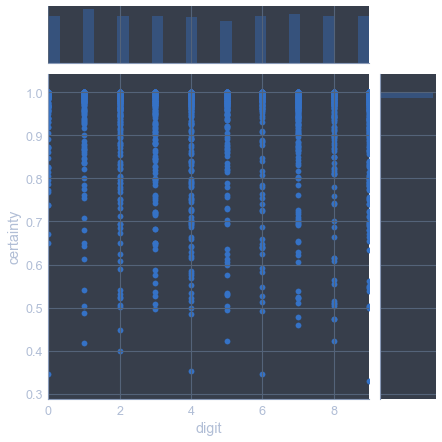

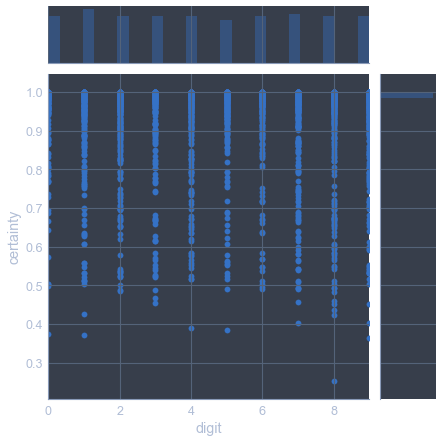

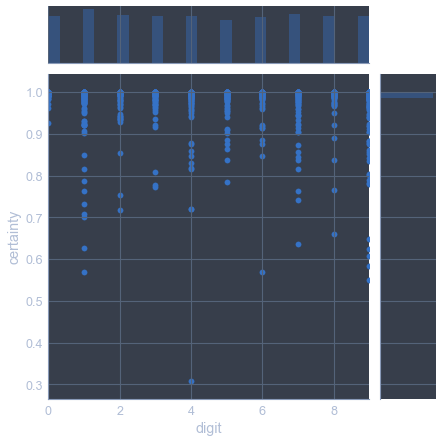

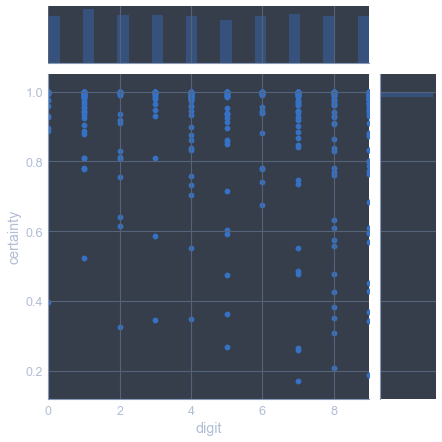

In [35]:
for item in pred_list:
    sns.jointplot(y=np.max(item, axis=1), x=np.argmax(item, axis=1),xlim=(0,9)).set_axis_labels("digit", "certainty");

In [40]:
avd_pred = np.argmax(p_avg, axis=1)
pd.DataFrame(data=np.vstack((range(1,class_most_certain.shape[0]+1), class_most_certain)).T,columns=['ImageId','Label']).to_csv('class_most_certain.csv', encoding='utf-8', index=False)

In [37]:
pred = model6.predict_classes(X_test)
pd.DataFrame(data=np.vstack((range(1,pred.shape[0]+1), pred)).T,columns=['ImageId','Label']).to_csv('pred6.csv', encoding='utf-8', index=False)